**Web-Scraping Mercado Libre**

Este código en Python utiliza varias bibliotecas, como `matplotlib` y `BeautifulSoup`, para obtener y visualizar los precios de tres artículos en páginas web de MercadoLibre. A continuación, se proporciona una breve introducción al código:

El código comienza importando las bibliotecas necesarias, incluyendo `matplotlib` para la creación de gráficos y `BeautifulSoup` y `requests` para obtener y analizar el contenido de páginas web.

Luego, se crea una lista de URLs que corresponden a los artículos que se desean analizar. Cada URL apunta a una página de un artículo en el sitio de MercadoLibre.

A continuación, el código define una función llamada `mameluco`. Esta función toma una URL como entrada, envía una solicitud a la página web, analiza el contenido de la página para extraer el precio del artículo y devuelve el precio como un número entero.

Después, se utiliza un bucle `for` para aplicar la función `mameluco` a cada URL en la lista, lo que resulta en una lista de precios.

Finalmente, se define una función llamada `imprime`, que utiliza la biblioteca `matplotlib` para crear un gráfico de barras que muestra los precios de los tres artículos. Los precios se representan en el eje Y, mientras que los nombres de los artículos se muestran en el eje X. Los colores de las barras se definen en las listas `color` y `edgecolor`. La función `imprime` se llama con las listas de precios y nombres de los artículos como argumentos al final del código.

En resumen, este código se utiliza para extraer y visualizar los precios de varios artículos en páginas web de MercadoLibre y generar un gráfico de barras que muestra los precios de estos artículos.

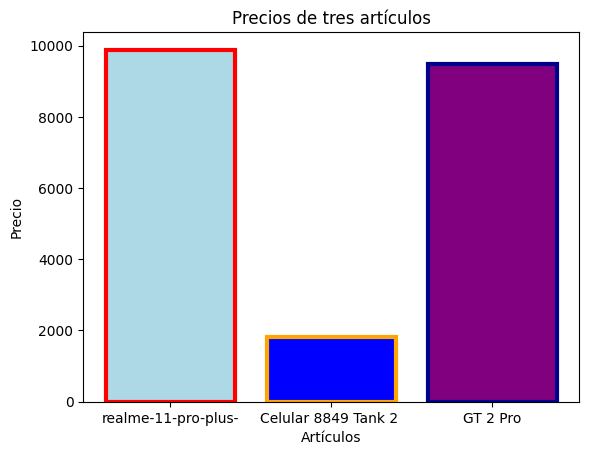

In [ ]:
# Se importa libreria para dibujar
import matplotlib.pyplot as plt
# Se iportan librerias para hacer peticiones a las paginas we y obtener su codigo
# , asi como tambien para tratar los datos web obtenidos
from bs4 import BeautifulSoup
import requests
#
# Se crea lista de paginas web.
urls = [
    'https://www.mercadolibre.com.mx/realme-11-pro-plus-12gb-ram-512gb-rom-200mp-ois-dual-sim-verde-5000-mah-100w-pantalla-curva-120hz-fhd/p/MLM23438802?pdp_filters=item_id:MLM1922556715#is_advertising=true&searchVariation=MLM23438802&position=1&search_layout=stack&type=pad&tracking_id=97805d59-1549-48d8-a60a-8b8beea8d935&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=1&ad_click_id=ZjZjY2ZlZWEtY2YwNi00YWI0LWJkZWItMDE3OWQwNWIyOTY3',
    'https://articulo.mercadolibre.com.mx/MLM-2286029578-celular-8849-tank-2-de-12gb-256gb-155000mah-con-proyector-_JM#polycard_client=bookmarks',
    'https://www.mercadolibre.com.mx/realme-gt-2-pro-dual-sim-256-gb-steel-black-12-gb-ram/p/MLM19130693?pdp_filters=item_id:MLM1507221033#is_advertising=true&searchVariation=MLM19130693&position=9&search_layout=stack&type=pad&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=9&ad_click_id=MjMzNjkyN2QtZmI2MC00ZDAzLWJiZDUtZGQ1OWI5NWU0MWFl'
]
color = ['lightblue', 'blue', 'purple']
edgecolor = ['red', 'orange', 'darkblue']
def mameluco(url):
  # Manda consultar la pagina "url" y guarda en "page" el contenido
  page = requests.get(url)
  # Secciona "page"
  sopita = BeautifulSoup(page.content, 'html.parser')
  #print(len(sopita))
  # Se crea una lista de todos los elementos (con find_all) que contienen las
  # etiquetas "span" y los atributos (attr)"class":"andes-money-amount__fraction"
  # con un limite de lista de 2 (limit=2)
  chango_tag = sopita.find_all('span', attrs={"class":"andes-money-amount__fraction"}, limit=2)
  # De esa lista se extrae la posicion 2 de la variable chango_tag1 (chango_tag[1]) y convierte
    # a string
  chango_tag1 = str(chango_tag[1])
  # Se vuelve a parir
  sopita1 = BeautifulSoup(chango_tag1, 'html.parser')
  # Con find() se obtiene lo que esta dentro de las etiquetas  span
  chango_tag2 = sopita1.find('span', attrs={"class":"andes-money-amount__fraction"})
  # Se le retira las comas
  price_str = chango_tag2.text.replace(',', '')
  # Se covierte a entero la variable price_str
  return int(price_str)
# Se crea la lista "precios" usando la funcion "mameluco" y un "for" que va
# recorriendo todas las paginas web guardadas en la variable "urls" y mandando
# una por una a la variable "url"
precios = [mameluco(url) for url in urls]
#print(precios)
# Se crea la lsita de aritculos
articulos = ['realme-11-pro-plus-', 'Celular 8849 Tank 2 ', 'GT 2 Pro']

# Se crea la funcion que gebera una gráfica de barras
def imprime(precios, articulos):
    # Crear la gráfica de barras
    color = ['lightblue', 'blue', 'purple']
    edgecolor = ['red', 'orange', 'darkblue']
    plt.bar( articulos, precios, color = color, edgecolor = edgecolor, linewidth=3)

    # Etiquetas del eje x
    plt.xlabel('Artículos')

    # Etiquetas del eje y
    plt.ylabel('Precio')

    # Título del gráfico
    plt.title('Precios de tres artículos')

    plt.show()

# Se manda a llamar la funcion "imprime" mandandole dos parametros:
# precios y articulos
imprime(precios, articulos)